In [1]:
%matplotlib inline
from util import *
import sklearn as skl
from sklearn import preprocessing
#from sklearn.mixture import GMM
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
our_data = SKLData(*process_data())

In [3]:
our_data.train(skl.neighbors.KNeighborsClassifier(10))

0.68918918918918914

In [2]:
# Read in our data
data = SKLData("./data/keystroke0.csv", \
        [lambda r: [float(rv) for rv in r[3:]], \
        lambda r: int(r[0][1:])])

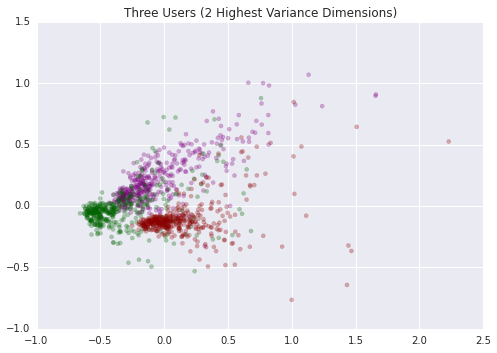

In [24]:
# First we have to ask: what does the data look like?
# For KNN, we want the data to be clustered nicely.
# It looks like this exists!

# Long tails biasing our sample
# We can throw out outliers first and then perform prediction
# Or, we can perform a square root or log transform.
data.plot(2, marker='.', alpha=0.3, color='purple', s=70)
data.plot(3, marker='.', alpha=0.3, color='darkgreen', s=70)
data.plot(5, marker='.', alpha=0.3, color='darkred', s=70)
plt.title("Three Users (2 Highest Variance Dimensions)")

In [5]:
data.train(skl.neighbors.KNeighborsClassifier(n_neighbors=2))

0.74117647058823533

In [6]:
data.train(skl.neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', p=1))

0.82843137254901966

In [7]:
def run_power(p=1, data=data):
    sqrtfun = lambda X: np.sign(X)*np.power(np.abs(X), p)
    clf = skl.neighbors.KNeighborsClassifier(n_neighbors=20)
    return data.train(clf, sqrtfun)

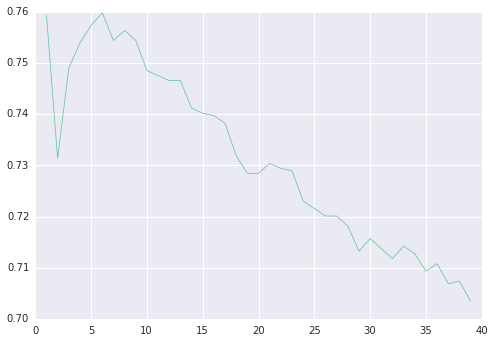

In [9]:
def run_neighbor(n=20, data=data):
    return data.train(skl.neighbors.KNeighborsClassifier(n_neighbors=n))

n_xs = np.array(range(1,40))
n_ys = [run_neighbor(n) for n in n_xs]
ppl.plot(n_xs, n_ys)

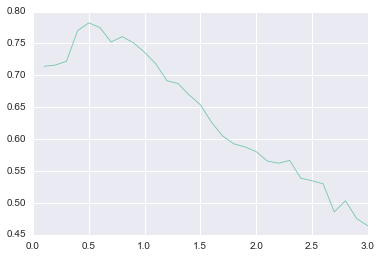

In [8]:
power_xs = np.array(range(1,31))/10.
power_ys = [run_power(p) for p in power_xs]
ppl.plot(power_xs, power_ys)

In [9]:
# We also want to answer: if we had an ideal model,
# one that only used the number of dimensions that we needed,
# how much would we have to model?

def run_pca(n=2, data=data):
    lpca = lambda x: skl.decomposition.PCA(n).fit_transform(x)
    clf = skl.neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1)
    return data.train(clf, lpca)

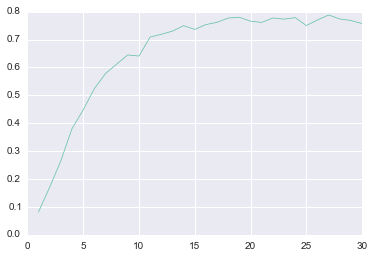

In [10]:
pca_xs = range(1,31)
pca_acc = [run_pca(i) for i in pca_xs]
# Looks like there's about 15 true dimensions in our data
# The other values don't really matter, probably because
# People tend to type the same way
# Future work: define a model that is more specific
ppl.plot(pca_xs, pca_acc)

In [10]:
# Transform to be imposter
real_users = [2,3,4,5,12]

from collections import defaultdict
rdict = defaultdict(lambda:0, {r:1 for r in real_users})
data.transform(lambda x:x, lambda ys: np.array([rdict[y] for y in ys]))

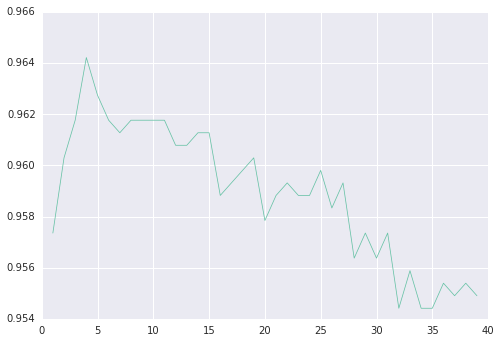

In [11]:
def run_neighbor(n=20, data=data):
    return data.train(skl.neighbors.KNeighborsClassifier(n_neighbors=n))

n_xs = np.array(range(1,40))
n_ys = [run_neighbor(n) for n in n_xs]
ppl.plot(n_xs, n_ys)

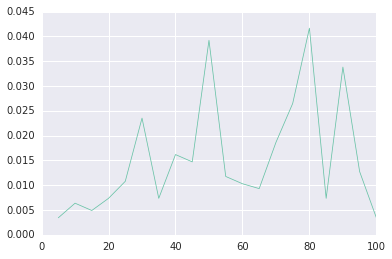

In [28]:
# GMM Code
# SKLEARN IS BAD
ys = [data.train(skl.mixture.GMM(i*5)) for i in xrange(1,21)]
xs = np.array(xrange(1,21))*5
ppl.plot(xs, ys)

In [4]:
gmm = GMM(2)
gmm.fit(data.X, data.y)
gmm.predict(data.X)

array([55, 36, 36, ..., 36, 36, 36])

In [3]:
data.train(GMM())

0.0

In [ ]:
from sklearn import cluster
xvals = skl.cluster.AgglomerativeClustering(len(np.unique(data.y))).fit_predict(data.X, data.y)
np.sum(xvals == data.y)/float(len(xvals))

(-3, 3)

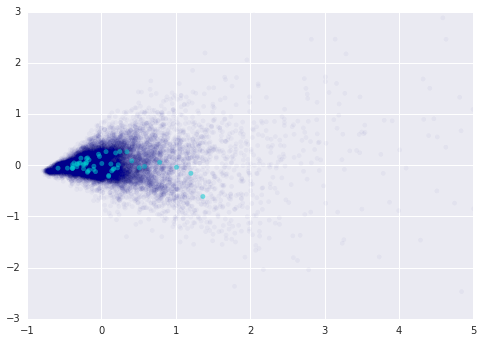

In [13]:
pca = skl.decomposition.PCA(2)
xnew = pca.fit_transform(data.X)
xn, yn = zip(*xnew)
plt.scatter(xn,yn, color='darkblue', alpha=0.03)
plt.scatter(*zip(*pca.transform(gmm.means)), color='darkturquoise', alpha=0.5)
plt.xlim([-1,5])
plt.ylim([-3,3])

In [13]:
from sklearn import mixture
data.transform(lambda x: skl.preprocessing.scale(x, 0),lambda y:y)
data.train(skl.mixture.GMM(56))

0.017156862745098041

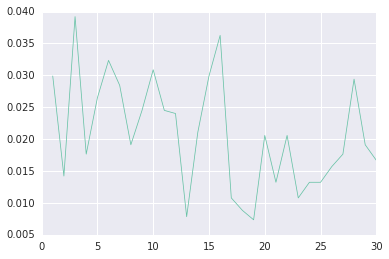

In [29]:
def run_gauss_pca(n=2, data=data):
    lpca = lambda x: skl.decomposition.PCA(n).fit_transform(x)
    clf = skl.mixture.GMM(56)
    return data.train(clf, lpca)

pca_xs = range(1,31)
pca_gauss_acc = [run_gauss_pca(i) for i in pca_xs]
ppl.plot(pca_xs, pca_gauss_acc)

In [36]:
data.train(skl.mixture.GMM(n_components=30, params='mc'))

0.019117647058823531

In [20]:
# We now move onto the GREYC Dataset
def getdata(row):
    x = [int(r) for r in row[5].strip().split(" ")[:60]]
    if len(x) == 0:
        raise ValueError("Length failed")
    return x


greyc = SKLData("./data/keystroke1.csv", [getdata, lambda r: int(r[7])])

In [12]:
greyc.train(skl.neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1))

0.78835978835978837

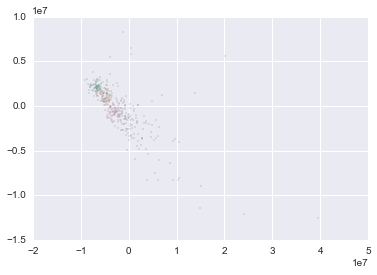

In [13]:
greyc.plot(1)
greyc.plot(2)
greyc.plot(3)
greyc.plot(4)

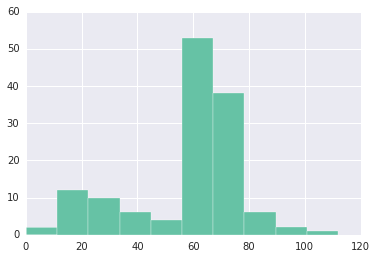

In [27]:
ppl.hist(np.bincount(greyc.y))